# Bank Churners Dataset

#### The dataset contains 10,127 entries and 21 columns.

- CLIENTNUM: Client number, a unique identifier.
- Attrition_Flag: Indicates if the customer is an existing customer or has churned.
- Customer_Age: Age of the customer.
- Gender: Gender of the customer.
- Dependent_count: Number of dependents.
- Education_Level: Educational level.
- Marital_Status: Marital status.
- Income_Category: Category of income.
- Card_Category: Type of card.
- Months_on_book: Number of months the customer has been with the bank.
- Total_Relationship_Count: Total number of products the customer has with the bank.
- Months_Inactive_12_mon: Number of months inactive in the last 12 months.
- Contacts_Count_12_mon: Number of contacts with the customer in the last 12 months.
- Credit_Limit: Credit limit on the customer’s credit cards.
- Total_Revolving_Bal: Total revolving balance on the credit card.
- Avg_Open_To_Buy: Average open to buy credit line (average of last 12 months).
- Total_Amt_Chng_Q4_Q1: Change in transaction amount (Q4 over Q1).
- Total_Trans_Amt: Total transaction amount in the last 12 months.
- Total_Trans_Ct: Total transaction count in the last 12 months.
- Total_Ct_Chng_Q4_Q1: Change in transaction count (Q4 over Q1).
- Avg_Utilization_Ratio: Average card utilization ratio.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE






## Step 1: Data Loading and Initial Inspection

In [2]:
file_path = '/Users/kusumsaichowdary/Downloads/Final_BankChurners.csv'
data = pd.read_csv(file_path)

data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### The dataset includes various types of data: integer (int64), floating-point (float64), and objects (likely strings).

## Step 2: Data Cleaning

In [4]:
detailed_data_types = data.dtypes

missing_values = data.isnull().sum()
placeholder_check = data.apply(lambda x: x.isin(['Unknown', 'NA', 'N/A', '?', '-']).sum())
detailed_missing_placeholder_report = pd.DataFrame({
    'Data Types': detailed_data_types,
    'Missing Values': missing_values,
    'Placeholders': placeholder_check
})

detailed_missing_placeholder_report




Data Types  Missing Values  Placeholders
CLIENTNUM                     int64               0             0
Attrition_Flag               object               0             0
Customer_Age                  int64               0             0
Gender                       object               0             0
Dependent_count               int64               0             0
Education_Level              object               0          1519
Marital_Status               object               0           749
Income_Category              object               0          1112
Card_Category                object               0             0
Months_on_book                int64               0             0
Total_Relationship_Count      int64               0             0
Months_Inactive_12_mon        int64               0             0
Contacts_Count_12_mon         int64               0             0
Credit_Limit                float64               0             0
Total_Revolving_Bal           int64               0             0
Avg_Open_To_Buy             float64               0             0
Total_Amt_Chng_Q4_Q1        float64               0             0
Total_Trans_Amt               int64               0             0
Total_Trans_Ct                int64               0             0
Total_Ct_Chng_Q4_Q1         float64               0             0
Avg_Utilization_Ratio       float64               0             0

The dataset does not contain any missing values, but there are placeholders marked as 'Unknown' in several categorical columns:

- Education_Level: 1,519 instances marked as 'Unknown'.
- Marital_Status: 749 instances marked as 'Unknown'.
- Income_Category: 1,112 instances marked as 'Unknown'.

Handling these 'Unknown' placeholders is important because they might affect the analysis and modeling. There are several strategies we can use:

- Imputation with mode: Replace 'Unknown' with the most frequent category, a central tendency measure, or predict these values using other variables in the dataset.
- model imputation: Treat 'Unknown' as a separate category. This approach is useful if the 'Unknown' values may have a distinct pattern or significance.
- Exclusion: Exclude these records from the analysis. This approach is less ideal as it reduces the dataset size and might introduce bias.

since we have less data, we are not employing the exclusion method, and we tried model imputation using Decision tree and results are very poor.


so, we'll replace the 'Unknown' placeholders with the most frequent category in each respective column. This approach is practical and commonly used.


In [5]:
columns_to_impute = ['Education_Level', 'Marital_Status', 'Income_Category']
for column in columns_to_impute:
    most_frequent_category = data[column].value_counts().idxmax()
    data[column].replace('Unknown', most_frequent_category, inplace=True)
imputation_check = data[columns_to_impute].apply(lambda x: (x == 'Unknown').sum())

imputation_check



Education_Level    0
Marital_Status     0
Income_Category    0
dtype: int64

In [6]:
mode_values = {col: data[col].mode()[0] for col in columns_to_impute}
mode_values

{'Education_Level': 'Graduate',
 'Marital_Status': 'Married',
 'Income_Category': 'Less than $40K'}

#### Statistical summary of numerical features

In [7]:

statistical_summary = data.describe()

statistical_summary


CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [8]:
categorical_stats = data.describe(include=['object'])
categorical_stats

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               6              3   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            4647           5436   

       Income_Category Card_Category  
count            10127         10127  
unique               5             4  
top     Less than $40K          Blue  
freq              4673          9436

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_distribution = {column: data[column].value_counts() for column in categorical_columns}

categorical_distribution



{'Attrition_Flag': Existing Customer    8500
 Attrited Customer    1627
 Name: Attrition_Flag, dtype: int64,
 'Gender': F    5358
 M    4769
 Name: Gender, dtype: int64,
 'Education_Level': Graduate         4647
 High School      2013
 Uneducated       1487
 College          1013
 Post-Graduate     516
 Doctorate         451
 Name: Education_Level, dtype: int64,
 'Marital_Status': Married     5436
 Single      3943
 Divorced     748
 Name: Marital_Status, dtype: int64,
 'Income_Category': Less than $40K    4673
 $40K - $60K       1790
 $80K - $120K      1535
 $60K - $80K       1402
 $120K +            727
 Name: Income_Category, dtype: int64,
 'Card_Category': Blue        9436
 Silver       555
 Gold         116
 Platinum      20
 Name: Card_Category, dtype: int64}

## EDA

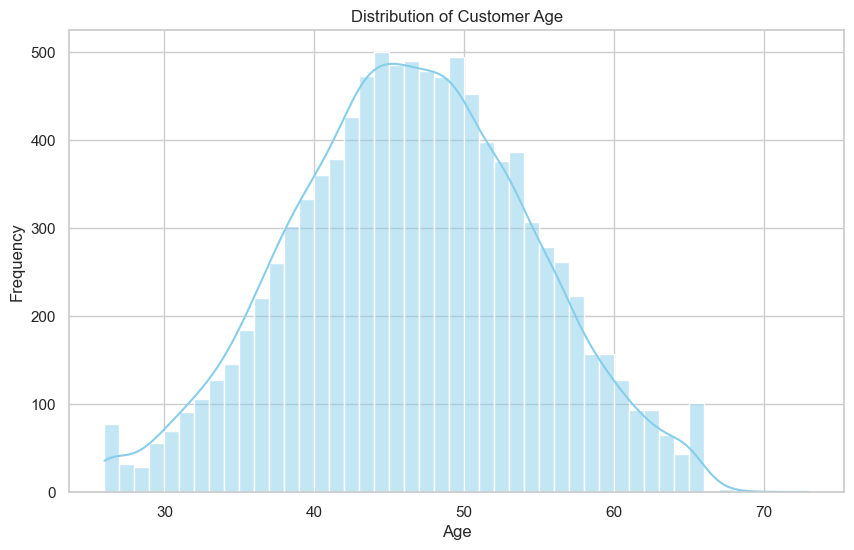

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], kde=True, color="skyblue")
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Observations:
- Distribution Shape: The distribution of 'Customer_Age' appears to be fairly symmetrical, suggesting a normal-like distribution.
- Central Tendency: The age of customers clusters around the mid-40s, indicating this is the most common age group in the dataset.
- Spread: The age range extends from the mid-20s to early 70s, with a concentration of data points in the 40-55 age range.
- Outliers: There do not appear to be any significant outliers, as the distribution tails off smoothly at both ends.
- Overall Interpretation: The customer base seems to be middle-aged, with a balanced age distribution. This might reflect a broad appeal of the bank's services across different age groups.

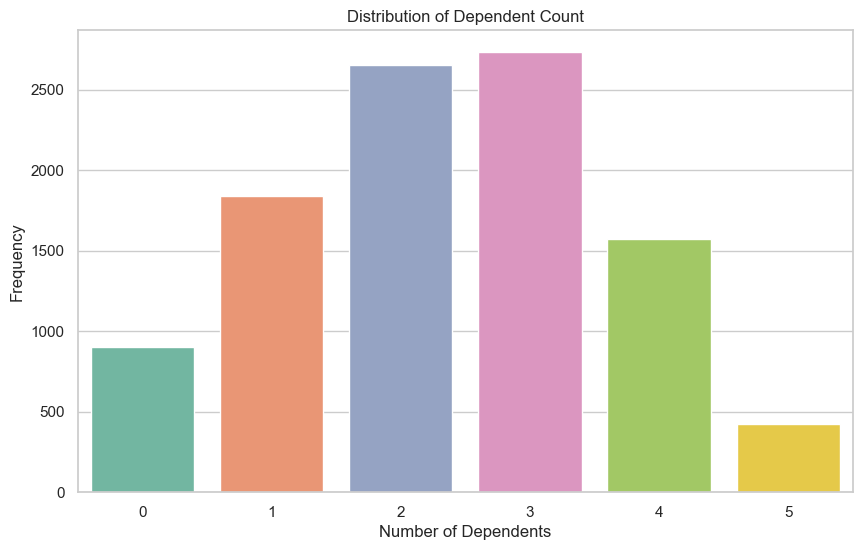

In [11]:
# Univariate analysis for 'Dependent_count'
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependent_count', data=data, palette="Set2")
plt.title('Distribution of Dependent Count')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.show()


Observations:
- Distribution Shape: The distribution of 'Dependent_count' is skewed to the right. Most customers have a smaller number of dependents.
- Most Common Values: The most common number of dependents is between 0 to 3. This range accounts for the majority of the customers in the dataset.
- Range and Spread: The 'Dependent_count' ranges from 0 to 5. There is a noticeable decrease in frequency as the number of dependents increases.
- Outliers: There are no apparent outliers; the values fall within a reasonable range for the number of dependents.
- Overall Interpretation: The data suggests that a significant portion of the bank's customers have few or no dependents, which might be indicative of the customer demographics, such as younger individuals or smaller families.

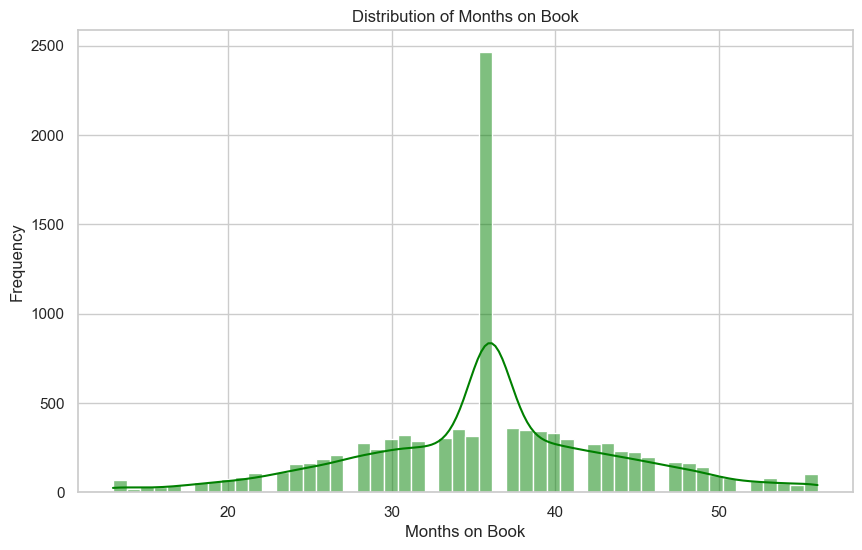

In [12]:
# Univariate analysis for 'Months_on_book'
plt.figure(figsize=(10, 6))
sns.histplot(data['Months_on_book'], kde=True, color="green")
plt.title('Distribution of Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.show()


Observations:
- Distribution Shape: The distribution of 'Months_on_book' is somewhat bell-shaped, indicating a tendency towards a normal distribution, but with some irregularities.
- Central Tendency: There's a noticeable concentration of customers who have been with the bank for around 30 to 40 months.
- Spread: The range extends from about 13 to 56 months, covering a wide span of customer-bank relationships in terms of duration.
- Outliers: The distribution appears consistent throughout its range without significant outliers.
- Overall Interpretation: The data suggests a diverse range of customer tenure, with a significant number of customers having a moderate length of relationship with the bank. This spread indicates both relatively new and long-term customers.

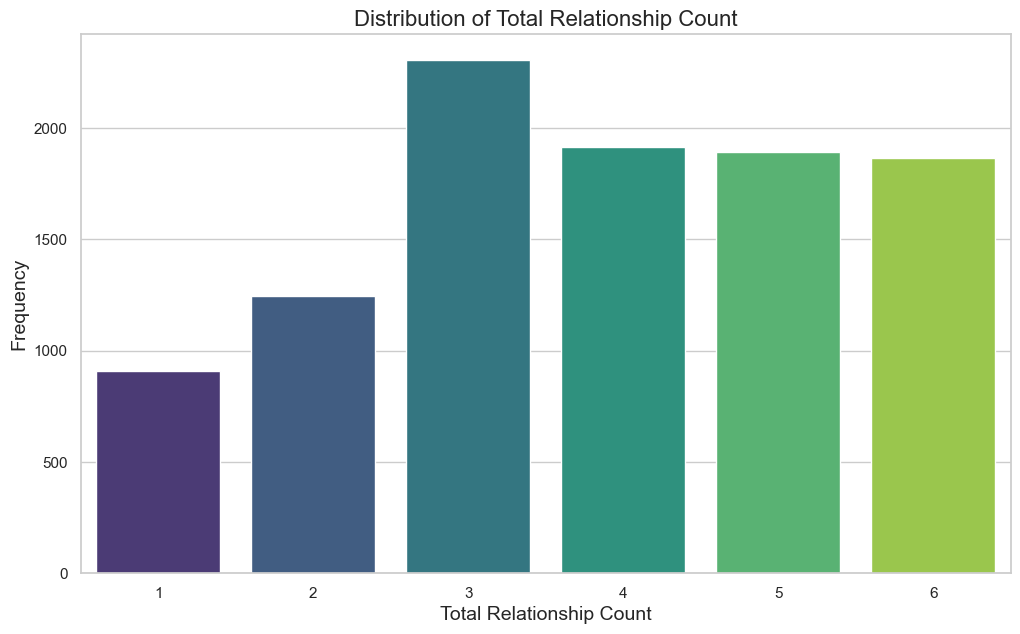

In [13]:
# Univariate analysis for 'Total_Relationship_Count'

plt.figure(figsize=(12, 7))
sns.countplot(x='Total_Relationship_Count', data=data, palette="viridis")
plt.title('Distribution of Total Relationship Count', fontsize=16)
plt.xlabel('Total Relationship Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


Observations:
- Distribution: The distribution shows a range of relationships customers have with the bank, from 1 to 6 products or services.
- Common Counts: The most common counts are 3 and 4, indicating that a large number of customers engage with multiple bank services.
- Variation: There's a noticeable decrease in frequency as the count increases, with fewer customers having 5 or 6 relationships.
- Outliers: The graph does not indicate any outliers, as all counts fall within the expected range.
- Overall Interpretation: This distribution suggests a diverse customer base in terms of engagement with the bank's products. Most customers maintain a moderate number of relationships, which can be indicative of customer loyalty or satisfaction with the bank's offerings.

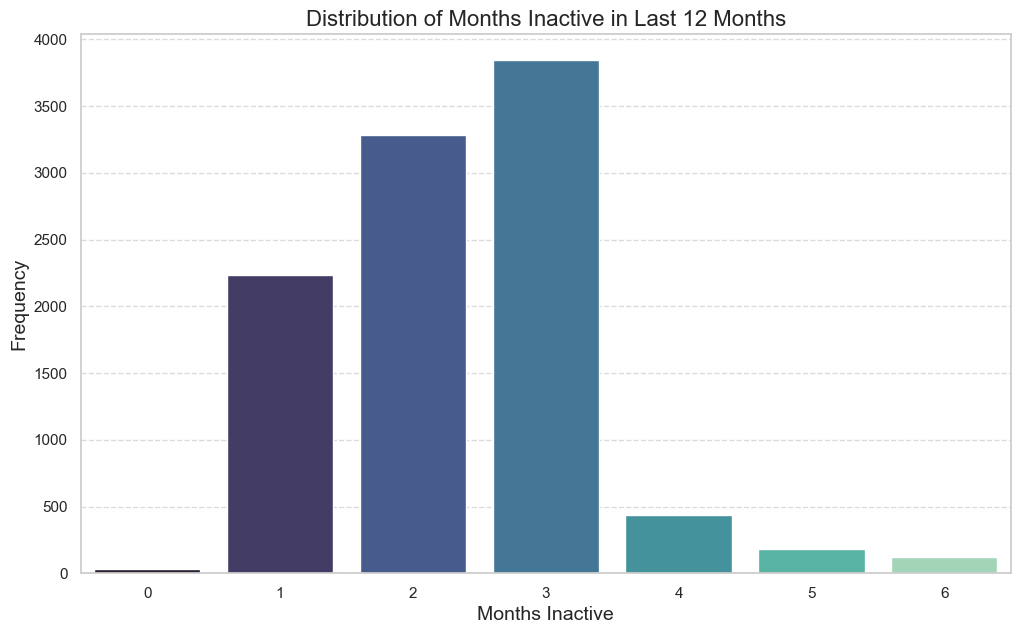

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Months_Inactive_12_mon', data=data, palette="mako")
plt.title('Distribution of Months Inactive in Last 12 Months', fontsize=16)
plt.xlabel('Months Inactive', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations:
- Distribution: The distribution shows the number of months customers were inactive in the last 12 months.
- Most Common Durations: The most common inactivity periods are 2 and 3 months. These counts are significantly higher than other values.
- Range: The inactivity period ranges from 0 to 6 months.
- Skewness: The distribution is right-skewed, with fewer customers having longer periods of inactivity.
- Outliers: There are no apparent outliers, and the values are within a reasonable range for inactivity periods.
- Overall Interpretation: Most customers have short periods of inactivity. Longer inactivity periods are less common, which might indicate good customer engagement or effective retention strategies by the bank.

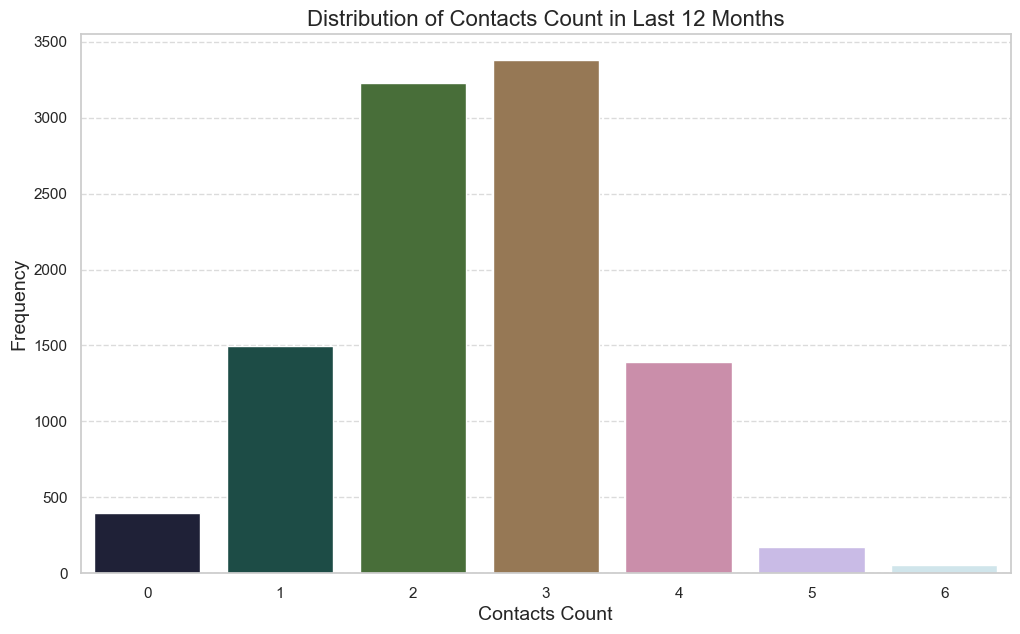

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Contacts_Count_12_mon', data=data, palette="cubehelix")
plt.title('Distribution of Contacts Count in Last 12 Months', fontsize=16)
plt.xlabel('Contacts Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations:
- Distribution: The graph represents the number of times customers contacted the bank in the last 12 months.
- Common Contact Counts: The most frequent contact counts are 2 and 3, indicating a moderate level of customer engagement with the bank.
- Range and Variation: The contact count ranges from 0 to 6, with a notable decrease in frequency as the count increases.
- Skewness: The distribution is right-skewed, showing that fewer customers have higher contact counts.
- Outliers: No significant outliers are observed; the distribution falls within a typical range for customer contacts.
- Overall Interpretation: This suggests that while a significant number of customers maintain regular contact with the bank, very frequent contacts (more than 4 times a year) are less common. This could reflect customer satisfaction or the effectiveness of the bank's self-service options.

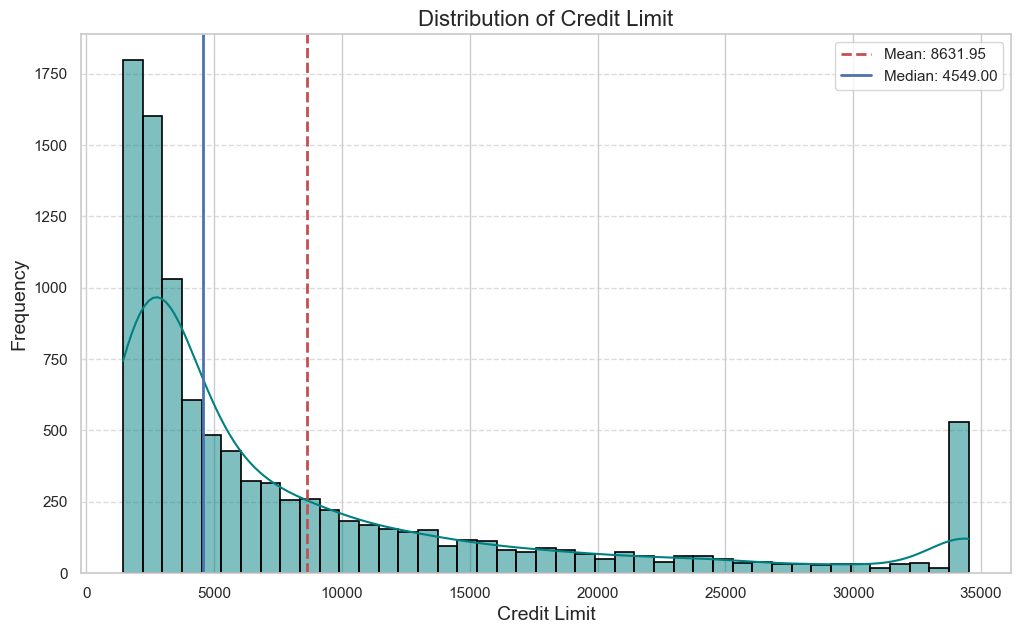

In [16]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Credit_Limit'], kde=True, color="teal", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Credit Limit', fontsize=16)
plt.xlabel('Credit Limit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding mean and median lines
mean_val = data['Credit_Limit'].mean()
median_val = data['Credit_Limit'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


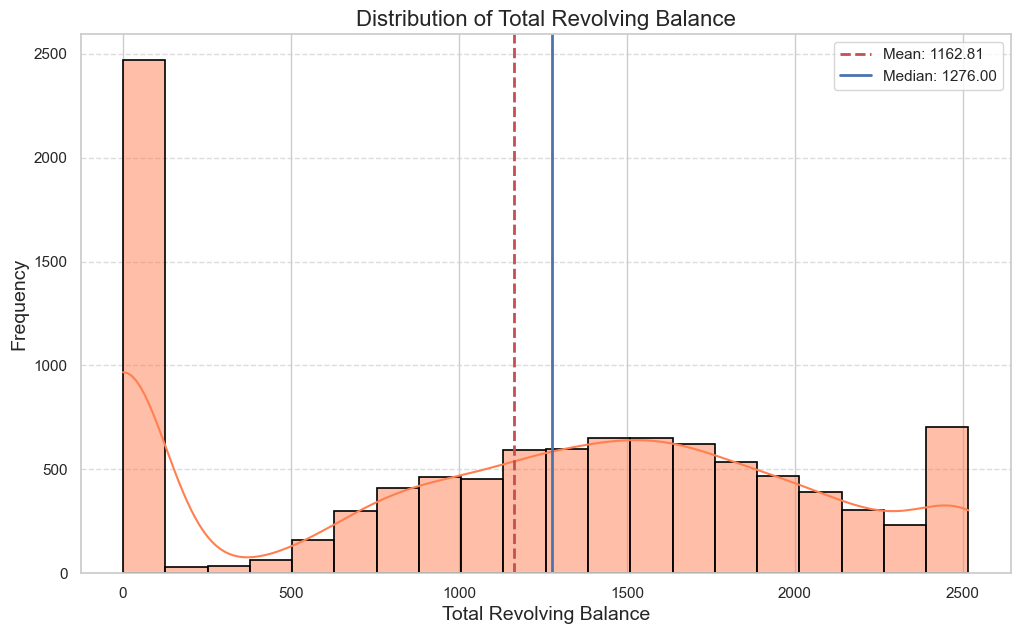

In [17]:
# Univariate analysis for 'Total_Revolving_Bal'
# Enhancing the graph with a visually appealing style

plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Revolving_Bal'], kde=True, color="coral", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Revolving Balance', fontsize=16)
plt.xlabel('Total Revolving Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding mean and median lines
mean_val = data['Total_Revolving_Bal'].mean()
median_val = data['Total_Revolving_Bal'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Revolving_Bal' (Total Revolving Balance) is somewhat multimodal, with peaks at different balance levels.
- Central Tendency: The mean and median are indicated on the graph. The presence of multiple peaks affects these measures of central tendency.
- Range and Spread: The balance ranges from 0 to a high value, with a significant number of customers having low revolving balances.
- Outliers: There are customers with very high revolving balances, but they are not excessively distant from the rest of the data.
- Overall Interpretation: The varied distribution suggests a diverse customer base in terms of revolving credit usage. The presence of a peak near zero may indicate a substantial number of customers who either pay off their balances regularly or don't use their revolving credit.

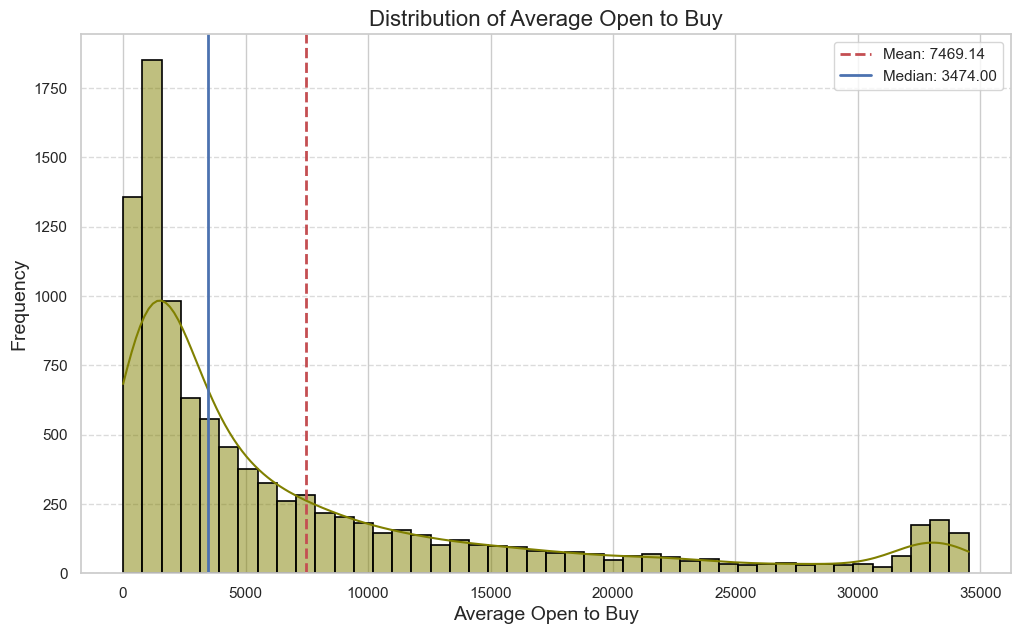

In [18]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Avg_Open_To_Buy'], kde=True, color="olive", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Average Open to Buy', fontsize=16)
plt.xlabel('Average Open to Buy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Avg_Open_To_Buy'].mean()
median_val = data['Avg_Open_To_Buy'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Avg_Open_To_Buy' is right-skewed, indicating that a majority of customers have lower amounts of unused credit.
- Central Tendency: The mean is notably higher than the median, as indicated by the respective red and blue lines. This discrepancy is typical in right-skewed distributions.
- Range and Spread: The range of 'Avg_Open_To_Buy' is extensive, showing that some customers have very high amounts of available credit, while many have relatively low amounts.
- Outliers: There are customers with exceptionally high 'Avg_Open_To_Buy' values, likely reflecting high credit limits or low revolving balances.
- Overall Interpretation: The distribution suggests that while most customers maintain lower levels of unused credit, a subset has significantly higher credit availability. This could indicate a segment of customers with higher financial capacity or more conservative spending habits.

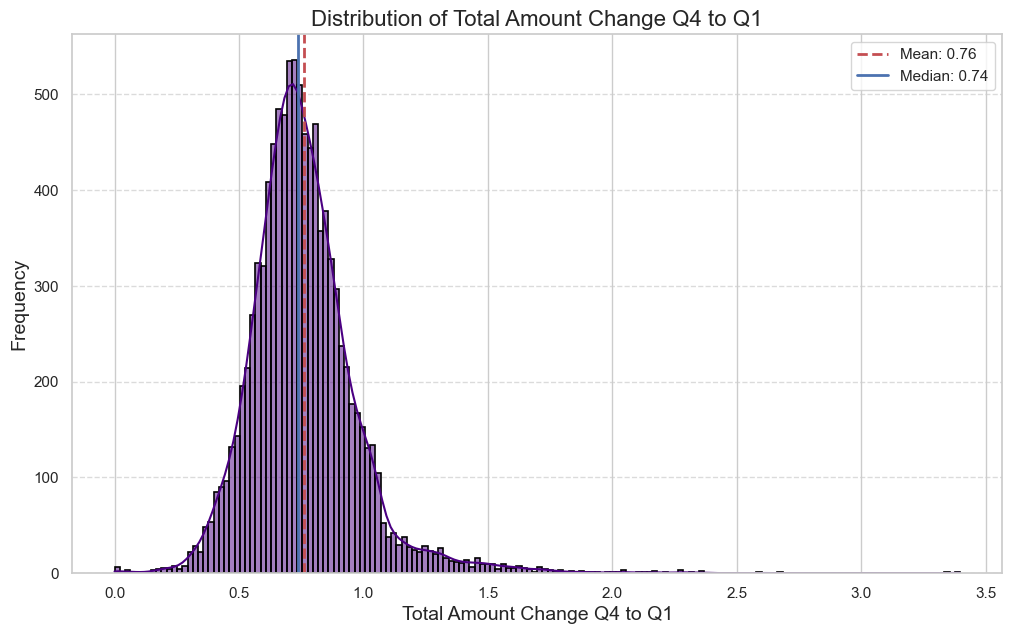

In [19]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Amt_Chng_Q4_Q1'], kde=True, color="indigo", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Amount Change Q4 to Q1', fontsize=16)
plt.xlabel('Total Amount Change Q4 to Q1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Amt_Chng_Q4_Q1'].mean()
median_val = data['Total_Amt_Chng_Q4_Q1'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Amt_Chng_Q4_Q1' (Total Amount Change from Quarter 4 to Quarter 1) is right-skewed. Most values cluster at the lower end, indicating minor changes in transaction amounts for most customers.
- Central Tendency: The mean and median are close but slightly different, shown by the red and blue lines. The mean is slightly higher due to the tail on the right.
- Range and Spread: The range of changes is wide, with some customers experiencing significant changes in transaction amounts between quarters.
- Outliers: The graph shows potential outliers with very high transaction amount changes, which could be due to seasonal spending or other factors.
- Overall Interpretation: This skewness suggests that while most customers do not experience drastic changes in their transaction amounts, a small group sees significant fluctuations. This could be indicative of varied customer spending behaviors or life events affecting financial activities.

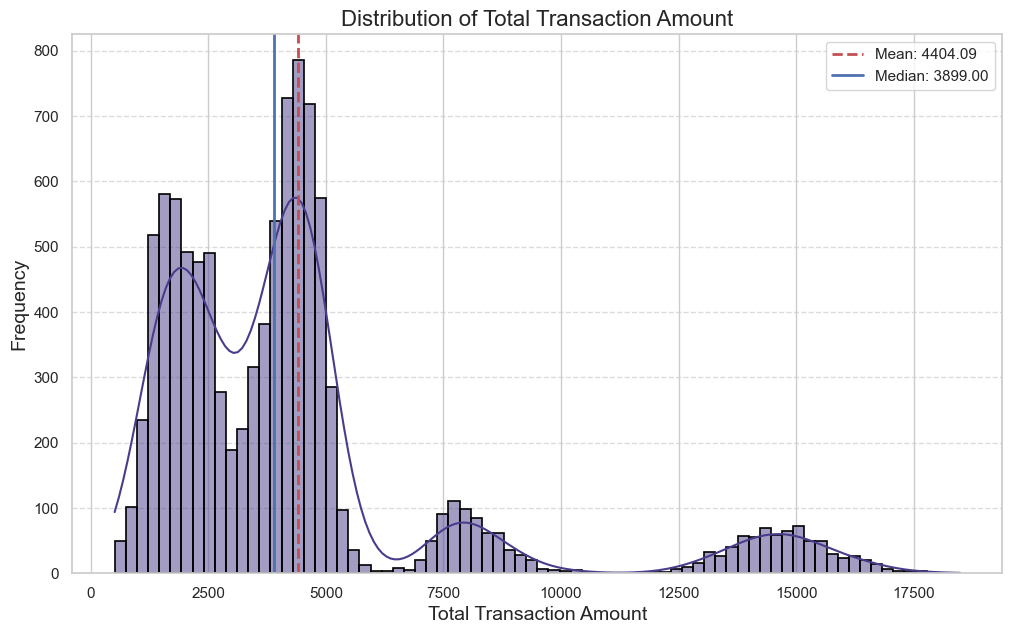

In [20]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Trans_Amt'], kde=True, color="darkslateblue", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Transaction Amount', fontsize=16)
plt.xlabel('Total Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Trans_Amt'].mean()
median_val = data['Total_Trans_Amt'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Trans_Amt' (Total Transaction Amount) is right-skewed, indicating that most customers have lower transaction amounts.
- Central Tendency: The mean is higher than the median, as shown by the red and blue lines, which is typical for right-skewed distributions. This difference suggests the presence of some high-transaction customers pulling the mean upwards.
- Range and Spread: The range is wide, with a few customers having very high total transaction amounts, as indicated by the long tail to the right.
- Outliers: The distribution suggests the presence of outliers with very high transaction amounts, which might be attributed to a small group of high-spending customers or occasional large transactions.
- Overall Interpretation: The skewed distribution indicates that while the majority of the bank's customers have modest transaction volumes, a smaller number engage in more significant spending or transaction activities.

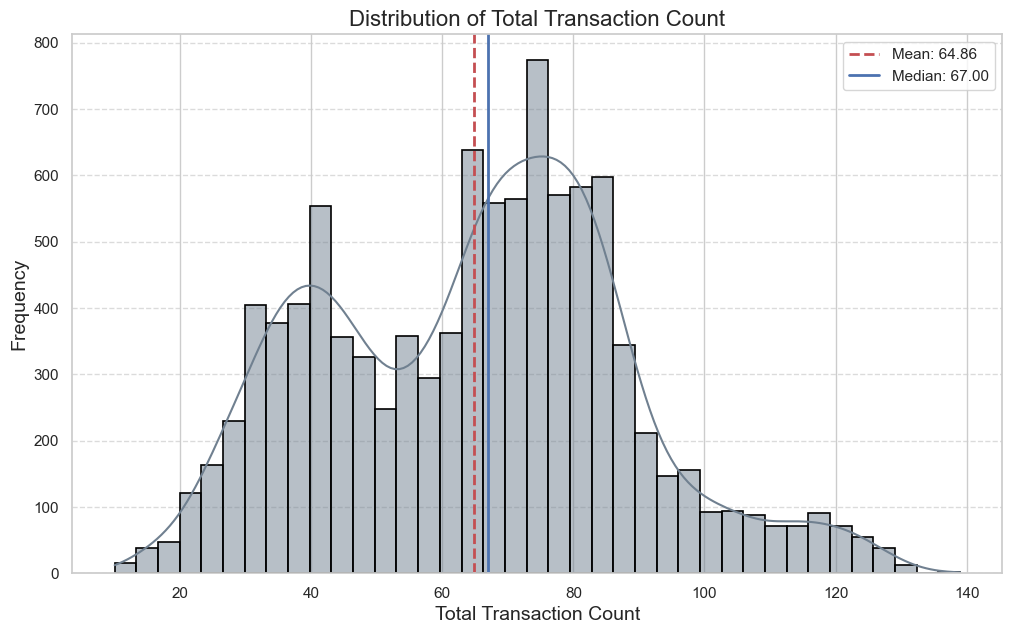

In [21]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Trans_Ct'], kde=True, color="slategray", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Transaction Count', fontsize=16)
plt.xlabel('Total Transaction Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Trans_Ct'].mean()
median_val = data['Total_Trans_Ct'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Trans_Ct' (Total Transaction Count) shows a somewhat bimodal shape, with two peaks indicating common transaction count ranges among customers.
- Central Tendency: The mean and median are closely aligned, as indicated by the red and blue lines. This alignment suggests a balanced distribution around the central values.
- Range and Spread: The range of transaction counts is broad, indicating varied transaction behaviors among customers.
- Outliers: The distribution does not show significant outliers, as most values are within a reasonable range of transaction counts.
- Overall Interpretation: The bimodal nature suggests two distinct groups of customers based on transaction frequency - one with a moderate number of transactions and another with a higher frequency. This might reflect different customer segments or usage patterns.


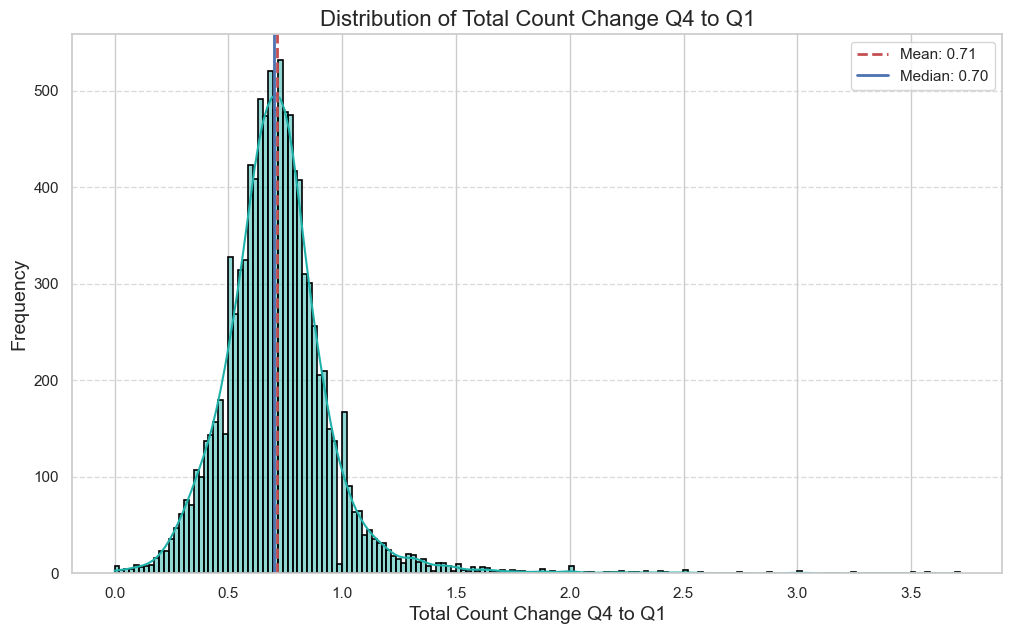

In [22]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Total_Ct_Chng_Q4_Q1'], kde=True, color="lightseagreen", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Total Count Change Q4 to Q1', fontsize=16)
plt.xlabel('Total Count Change Q4 to Q1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Total_Ct_Chng_Q4_Q1'].mean()
median_val = data['Total_Ct_Chng_Q4_Q1'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Total_Ct_Chng_Q4_Q1' (Total Count Change from Quarter 4 to Quarter 1) is right-skewed. Most customers have lower changes in their transaction counts.
- Central Tendency: The mean is slightly higher than the median, as shown by the red and blue lines. This difference is typical for right-skewed distributions and indicates the influence of higher values on the mean.
- Range and Spread: The range of change is wide, with some customers experiencing significant changes in their transaction counts between quarters.
- Outliers: The graph suggests the presence of outliers with very high count changes, potentially reflecting significant shifts in transaction behavior for a minority of customers.
- Overall Interpretation: The skewness indicates that while most customers do not experience major changes in transaction counts between quarters, a smaller group sees more significant fluctuations. This could be due to seasonal factors, lifestyle changes, or changes in financial behavior.

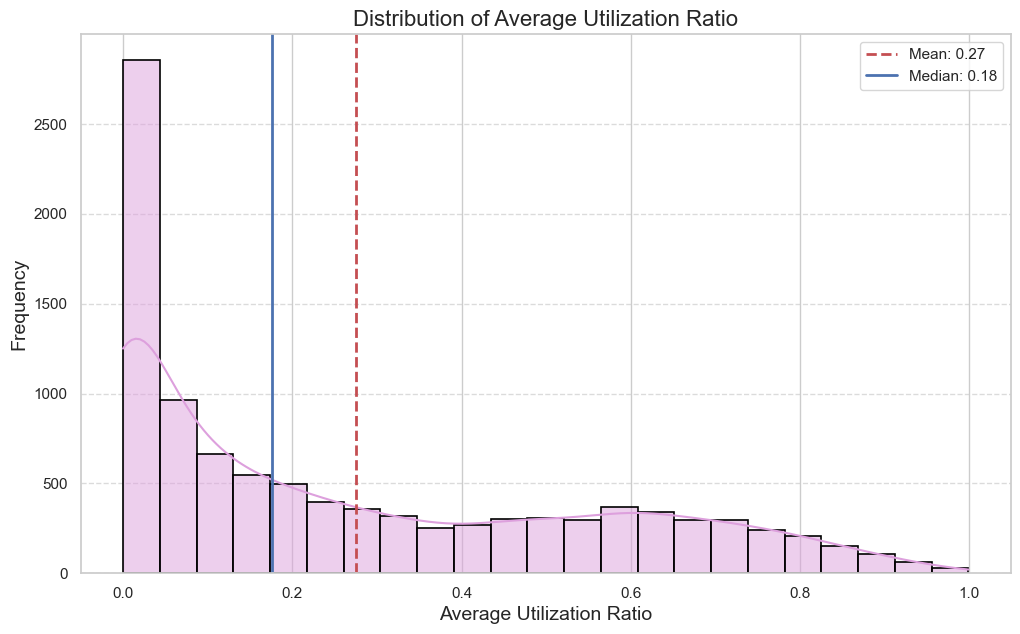

In [23]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Avg_Utilization_Ratio'], kde=True, color="plum", edgecolor='black', linewidth=1.2)
plt.title('Distribution of Average Utilization Ratio', fontsize=16)
plt.xlabel('Average Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_val = data['Avg_Utilization_Ratio'].mean()
median_val = data['Avg_Utilization_Ratio'].median()
plt.axvline(mean_val, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

plt.legend()
plt.show()


Observations:
- Distribution Shape: The distribution of 'Avg_Utilization_Ratio' is somewhat bimodal, with peaks at lower and higher utilization ratios.
- Central Tendency: The mean and median are indicated by the red and blue lines. The presence of two peaks affects these measures, suggesting diverse utilization patterns among customers.
- Range and Spread: The utilization ratio ranges from 0 to just under 1.0, indicating varying levels of credit utilization among customers.
- Outliers: The distribution does not show significant outliers, as most values are within a typical range for utilization ratios.
- Overall Interpretation: The bimodal distribution suggests two distinct groups of customers - one with low utilization and another with higher utilization. This might reflect different financial behaviors, such as customers who regularly use and pay off their credit versus those who maintain higher ongoing balances.

### Univariate analysis (Categorical columns)

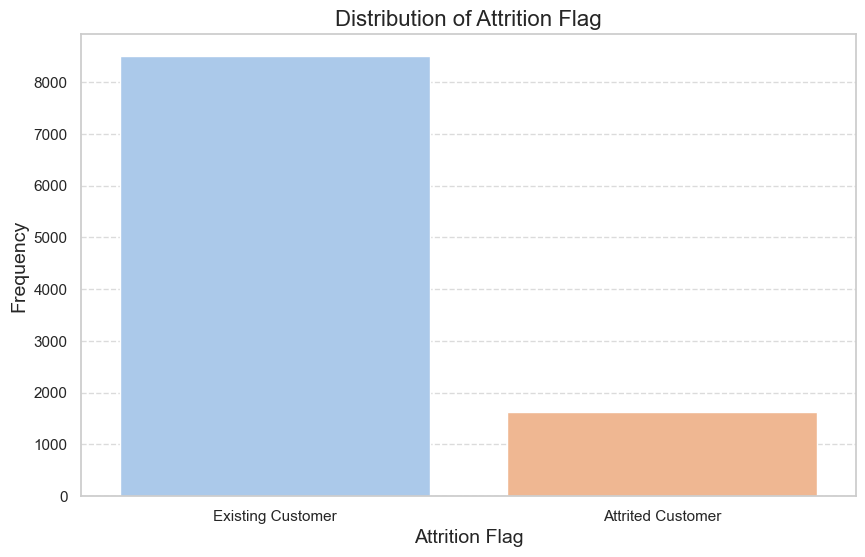

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition_Flag', data=data, palette="pastel")
plt.title('Distribution of Attrition Flag', fontsize=16)
plt.xlabel('Attrition Flag', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Distribution: The graph shows the distribution of customers by their attrition status - either 'Existing Customer' or 'Attrited Customer'.
- Frequency: A significant majority of customers are classified as 'Existing Customers', indicating a lower proportion of customer attrition.
- Imbalance: There is a noticeable imbalance between the two categories, with 'Existing Customers' vastly outnumbering 'Attrited Customers'.
- Implications for Analysis: This imbalance might affect certain types of analyses, especially predictive modeling, where techniques to address class imbalance may be necessary.
- Overall Interpretation: The distribution suggests that the bank has been successful in retaining most of its customers, but the presence of attrited customers indicates areas for potential improvement in customer retention strategies.

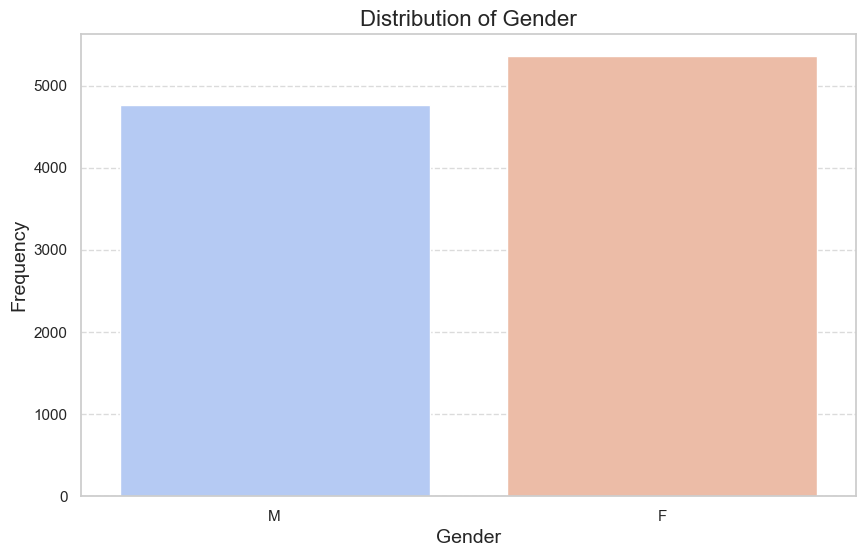

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data, palette="coolwarm")
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Distribution: The graph illustrates the gender distribution of customers, categorized as 'M' (Male) and 'F' (Female).
- Gender Ratio: There is a slight predominance of female customers compared to male customers in the dataset.
- Balance: While not perfectly balanced, the gender distribution is relatively even, indicating a diverse customer base in terms of gender.
- Implications for Analysis: The relatively balanced gender distribution is beneficial for analyses that might be sensitive to gender proportions, such as customer behavior studies or targeted marketing strategies.
- Overall Interpretation: The distribution suggests that the bank’s customer base is quite diverse in terms of gender, which might reflect the bank's broad appeal across different gender demographics.

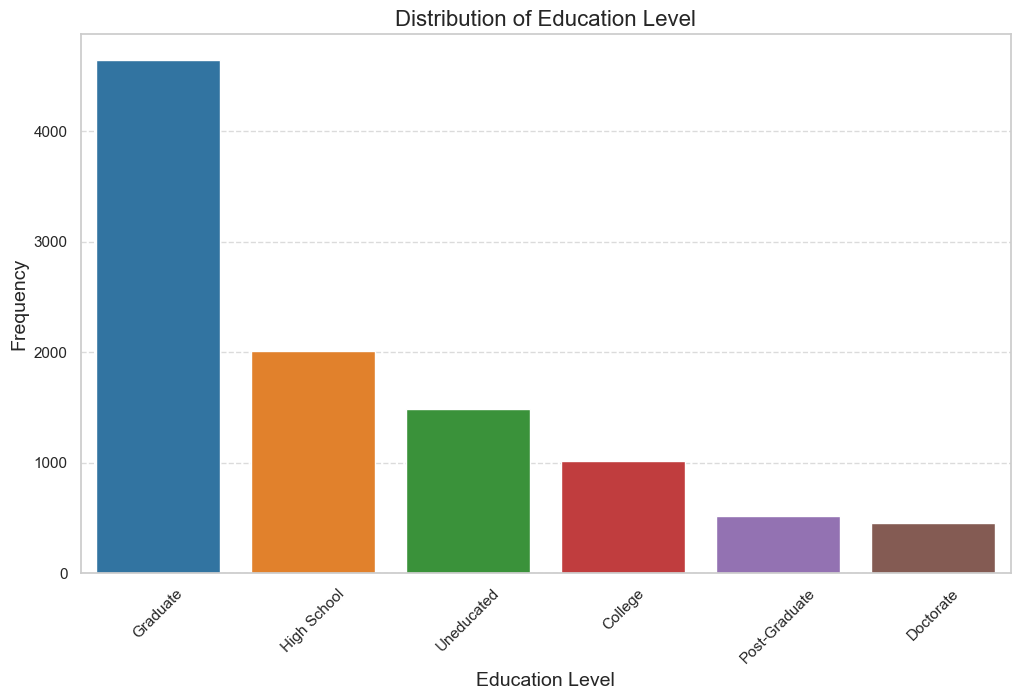

In [26]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Education_Level', data=data, order = data['Education_Level'].value_counts().index, palette="tab10")
plt.title('Distribution of Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Distribution: The graph displays the distribution of customers across different education levels.
- Most Common Education Levels: 'Graduate' and 'High School' are the most common education levels among the customers, followed by 'Uneducated' and 'College'.
- Variety of Education Levels: The dataset includes a range of education levels, from 'Uneducated' to 'Doctorate', indicating a diverse customer base in terms of educational background.
- Implications for Analysis: This diversity in education levels could be relevant for analyses related to financial product preferences, marketing strategies, or understanding the financial behavior of different educational groups.
- Overall Interpretation: The distribution suggests that the bank services a wide spectrum of customers with varied educational backgrounds, which could reflect its broad market reach and appeal.

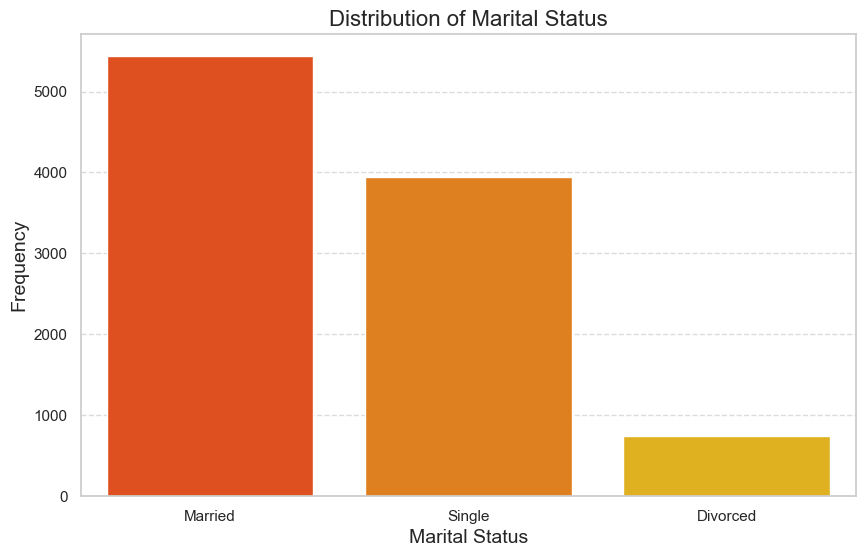

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=data, palette="autumn")
plt.title('Distribution of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Distribution: The graph shows the marital status of customers, categorized into 'Married', 'Single', 'Divorced', and 'Other'.
- Most Common Status: 'Married' is the most prevalent marital status among the customers, followed by 'Single'.
- Diversity in Marital Status: The dataset includes customers with a variety of marital statuses, indicating a diverse customer base in this aspect.
- Implications for Analysis: Understanding the distribution of marital status can be important for targeted marketing campaigns, product offerings, and analyzing customer behavior patterns.
- Overall Interpretation: The presence of diverse marital statuses suggests that the bank caters to a wide range of customers, potentially with different financial needs and preferences based on their marital status.


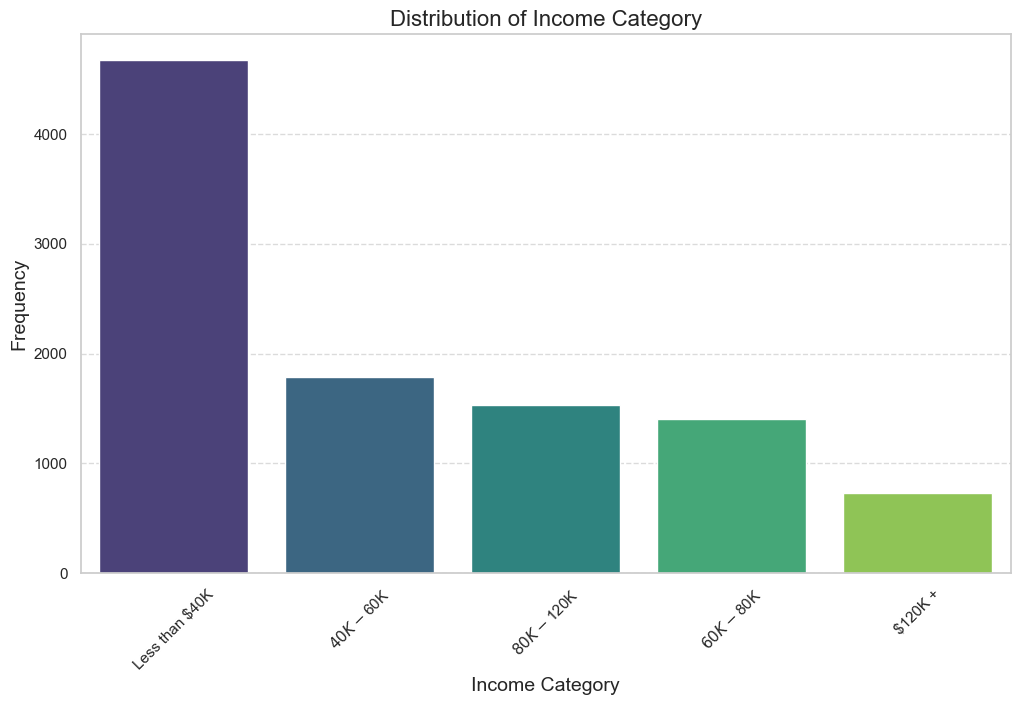

In [28]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Income_Category', data=data, order = data['Income_Category'].value_counts().index, palette="viridis")
plt.title('Distribution of Income Category', fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Distribution: The graph displays the income categories of customers, ranging from 'Less than 40K' to '120K +'.
- Most Common Income Categories: The most common income category is 'Less than 40K', followed by '40K - 60K'. Higher income categories, such as '80K - 120K' and '120K +', have fewer customers.
- Income Diversity: The dataset encompasses a wide range of income levels, indicating a diverse customer base in terms of financial standing.
- Implications for Analysis: This income distribution is significant for analyses related to spending behavior, credit usage, product suitability, and targeted marketing strategies.
- Overall Interpretation: The distribution suggests that the bank's customer base includes a broad spectrum of income levels, with a notable proportion of customers in the lower income brackets. This diversity is important for understanding the financial needs and preferences of different customer segments.

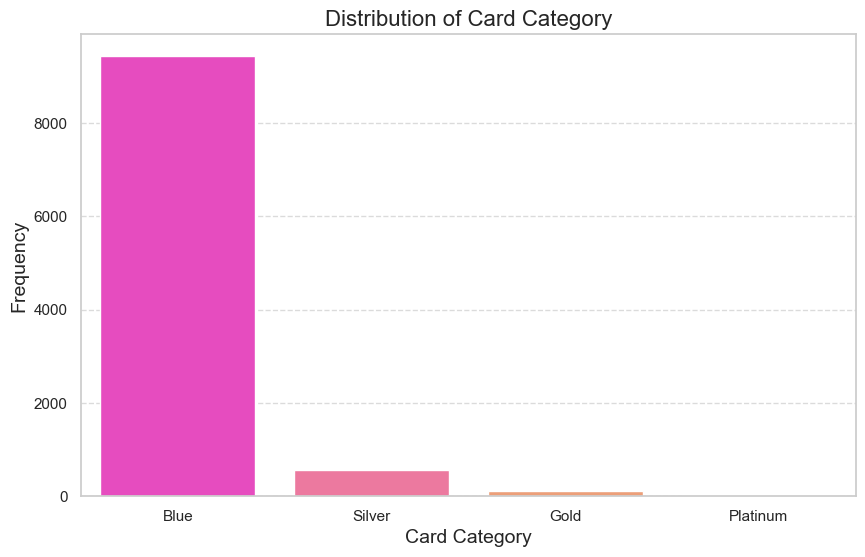

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', data=data, order = data['Card_Category'].value_counts().index, palette="spring")
plt.title('Distribution of Card Category', fontsize=16)
plt.xlabel('Card Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations:
- Distribution: The graph illustrates the distribution of customers across different card categories - 'Blue', 'Silver', 'Gold', and 'Platinum'.
- Dominance of Blue Category: A vast majority of customers possess the 'Blue' category card, indicating it's the most common and possibly the standard card offering.
- Limited Higher Tier Cards: The 'Silver', 'Gold', and 'Platinum' categories have significantly fewer customers, suggesting these are premium offerings that cater to a smaller segment of the customer base.
- Implications for Analysis: This distribution can be relevant for understanding the bank's product segmentation and customer preferences for different levels of banking services.
- Overall Interpretation: The overwhelming preference for the 'Blue' card category might reflect the bank’s positioning or customer demographics, with a focus on mass-market products.

In [30]:
# Categorical Analysis
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_distribution = {column: data[column].value_counts() for column in categorical_columns}

categorical_distribution



{'Attrition_Flag': Existing Customer    8500
 Attrited Customer    1627
 Name: Attrition_Flag, dtype: int64,
 'Gender': F    5358
 M    4769
 Name: Gender, dtype: int64,
 'Education_Level': Graduate         4647
 High School      2013
 Uneducated       1487
 College          1013
 Post-Graduate     516
 Doctorate         451
 Name: Education_Level, dtype: int64,
 'Marital_Status': Married     5436
 Single      3943
 Divorced     748
 Name: Marital_Status, dtype: int64,
 'Income_Category': Less than $40K    4673
 $40K - $60K       1790
 $80K - $120K      1535
 $60K - $80K       1402
 $120K +            727
 Name: Income_Category, dtype: int64,
 'Card_Category': Blue        9436
 Silver       555
 Gold         116
 Platinum      20
 Name: Card_Category, dtype: int64}

### Data Preprocessing

In [31]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [32]:
data = data.drop('CLIENTNUM', axis=1)

In [33]:
one_hot_encoder = OneHotEncoder(sparse=False)
nominal_columns = ['Gender', 'Marital_Status', 'Card_Category']
one_hot_encoded_data = one_hot_encoder.fit_transform(data[nominal_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(nominal_columns))
label_encoder = LabelEncoder()
ordinal_columns = ['Education_Level', 'Income_Category']
for column in ordinal_columns:
    data[column] = label_encoder.fit_transform(data[column])

data_encoded = data.drop(nominal_columns, axis=1)
data_encoded = pd.concat([data_encoded, one_hot_encoded_df], axis=1)

data_encoded.head()


/Users/kusumsaichowdary/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
0  Existing Customer            45                3                3   
1  Existing Customer            49                5                2   
2  Existing Customer            51                3                2   
3  Existing Customer            40                4                3   
4  Existing Customer            40                3                5   

   Income_Category  Months_on_book  Total_Relationship_Count  \
0                2              39                         5   
1                4              44                         6   
2                3              36                         4   
3                4              34                         3   
4                2              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
0                       1                      3       12691.0  ...   
1                       1                      2        8256.0  ...   
2                       1                      0        3418.0  ...   
3                       4                      1        3313.0  ...   
4                       1                      0        4716.0  ...   

   Avg_Utilization_Ratio  Gender_F  Gender_M  Marital_Status_Divorced  \
0                  0.061       0.0       1.0                      0.0   
1                  0.105       1.0       0.0                      0.0   
2                  0.000       0.0       1.0                      0.0   
3                  0.760       1.0       0.0                      0.0   
4                  0.000       0.0       1.0                      0.0   

   Marital_Status_Married  Marital_Status_Single  Card_Category_Blue  \
0                     1.0                    0.0                 1.0   
1                     0.0                    1.0                 1.0   
2                     1.0                    0.0                 1.0   
3                     1.0                    0.0                 1.0   
4                     1.0                    0.0                 1.0   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
0                 0.0                     0.0                   0.0  
1                 0.0                     0.0                   0.0  
2                 0.0                     0.0                   0.0  
3                 0.0                     0.0                   0.0  
4                 0.0                     0.0                   0.0  

[5 rows x 26 columns]

In [34]:
label_encoder = LabelEncoder()
data_encoded['Attrition_Flag'] = label_encoder.fit_transform(data_encoded['Attrition_Flag'])

# Splitting the data into features and target variable
X = data_encoded.drop('Attrition_Flag', axis=1)
y = data_encoded['Attrition_Flag']

# Applying SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [35]:
class_distribution= pd.Series(y_resampled).value_counts()
class_distribution

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

In [36]:
print("Resampled dataset shape:", X_resampled.shape)


Resampled dataset shape: (17000, 25)


In [37]:
y_resampled.shape

(17000,)

In [38]:
data_after_smote = pd.concat([X_resampled, y_resampled], axis=1)

In [39]:
data_after_smote.head()

Customer_Age  Dependent_count  Education_Level  Income_Category  \
0            45                3                3                2   
1            49                5                2                4   
2            51                3                2                3   
3            40                4                3                4   
4            40                3                5                2   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  Gender_F  \
0                      3       12691.0                  777  ...       0.0   
1                      2        8256.0                  864  ...       1.0   
2                      0        3418.0                    0  ...       0.0   
3                      1        3313.0                 2517  ...       1.0   
4                      0        4716.0                    0  ...       0.0   

   Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
0       1.0                      0.0                     1.0   
1       0.0                      0.0                     0.0   
2       1.0                      0.0                     1.0   
3       0.0                      0.0                     1.0   
4       1.0                      0.0                     1.0   

   Marital_Status_Single  Card_Category_Blue  Card_Category_Gold  \
0                    0.0                 1.0                 0.0   
1                    1.0                 1.0                 0.0   
2                    0.0                 1.0                 0.0   
3                    0.0                 1.0                 0.0   
4                    0.0                 1.0                 0.0   

   Card_Category_Platinum  Card_Category_Silver  Attrition_Flag  
0                     0.0                   0.0               1  
1                     0.0                   0.0               1  
2                     0.0                   0.0               1  
3                     0.0                   0.0               1  
4                     0.0                   0.0               1  

[5 rows x 26 columns]

Feature: Customer_Age, Score: 0.02156
Feature: Dependent_count, Score: 0.00751
Feature: Education_Level, Score: 0.00666
Feature: Income_Category, Score: 0.00701
Feature: Months_on_book, Score: 0.01380
Feature: Total_Relationship_Count, Score: 0.05436
Feature: Months_Inactive_12_mon, Score: 0.01433
Feature: Contacts_Count_12_mon, Score: 0.01135
Feature: Credit_Limit, Score: 0.02399
Feature: Total_Revolving_Bal, Score: 0.10189
Feature: Avg_Open_To_Buy, Score: 0.02332
Feature: Total_Amt_Chng_Q4_Q1, Score: 0.04402
Feature: Total_Trans_Amt, Score: 0.20817
Feature: Total_Trans_Ct, Score: 0.22002
Feature: Total_Ct_Chng_Q4_Q1, Score: 0.07590
Feature: Avg_Utilization_Ratio, Score: 0.04651
Feature: Gender_F, Score: 0.02989
Feature: Gender_M, Score: 0.03211
Feature: Marital_Status_Divorced, Score: 0.00375
Feature: Marital_Status_Married, Score: 0.02680
Feature: Marital_Status_Single, Score: 0.02084
Feature: Card_Category_Blue, Score: 0.00262
Feature: Card_Category_Gold, Score: 0.00091
Feature: Ca

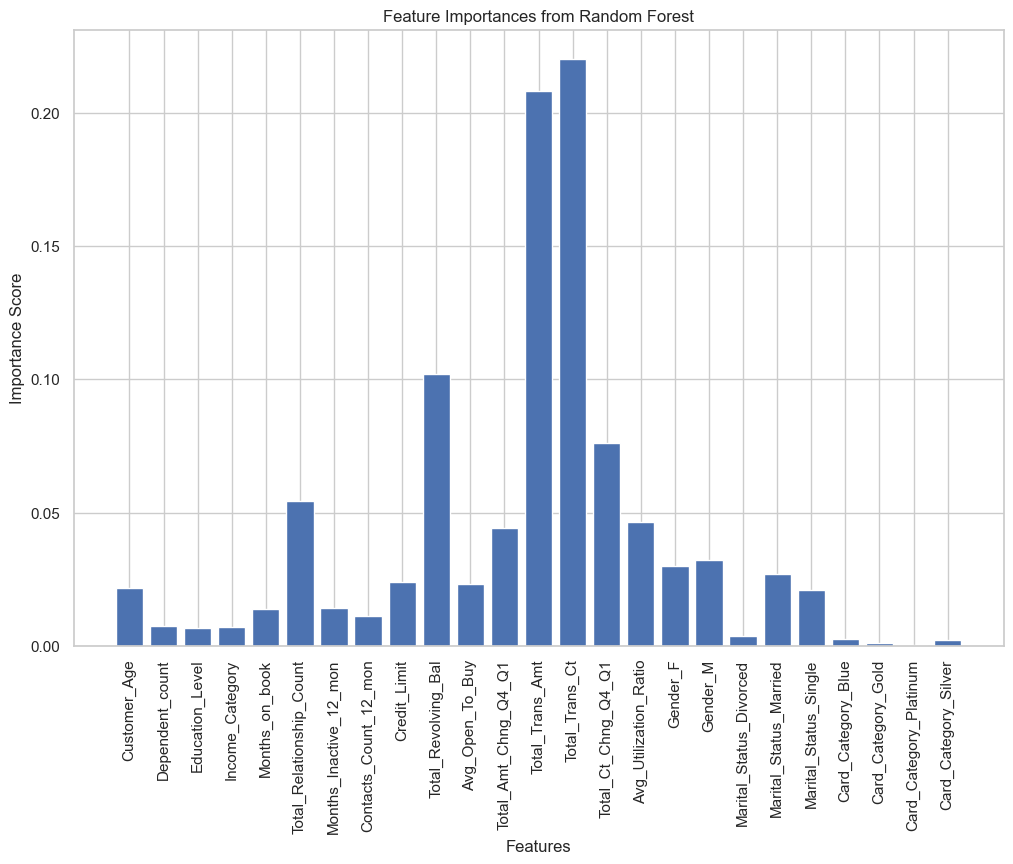

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X_resampled.columns  # Getting the feature names

for i in range(len(importances)):
    print('Feature: %s, Score: %.5f' % (feature_names[i], importances[i]))

plt.figure(figsize=(12, 8)) 
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.show()



In [41]:
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print sorted feature importances
print("Sorted Feature Importances:")
print(feature_importances)


Sorted Feature Importances:
Total_Trans_Ct              0.220017
Total_Trans_Amt             0.208168
Total_Revolving_Bal         0.101892
Total_Ct_Chng_Q4_Q1         0.075904
Total_Relationship_Count    0.054360
Avg_Utilization_Ratio       0.046513
Total_Amt_Chng_Q4_Q1        0.044021
Gender_M                    0.032111
Gender_F                    0.029890
Marital_Status_Married      0.026795
Credit_Limit                0.023990
Avg_Open_To_Buy             0.023317
Customer_Age                0.021564
Marital_Status_Single       0.020837
Months_Inactive_12_mon      0.014326
Months_on_book              0.013799
Contacts_Count_12_mon       0.011352
Dependent_count             0.007513
Income_Category             0.007010
Education_Level             0.006664
Marital_Status_Divorced     0.003749
Card_Category_Blue          0.002619
Card_Category_Silver        0.002375
Card_Category_Gold          0.000914
Card_Category_Platinum      0.000302
dtype: float64


In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 100)

rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust the number of features as needed
rfe.fit(X_resampled, y_resampled)
feature_names = X_resampled.columns

print("RFE Feature Selection:")
for i in range(len(rfe.support_)):
    print('Feature: %s, Selected: %s, Rank: %d' % (feature_names[i], rfe.support_[i], rfe.ranking_[i]))


/Users/kusumsaichowdary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kusumsaichowdary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

RFE Feature Selection:
Feature: Customer_Age, Selected: False, Rank: 5
Feature: Dependent_count, Selected: False, Rank: 3
Feature: Education_Level, Selected: False, Rank: 10
Feature: Income_Category, Selected: True, Rank: 1
Feature: Months_on_book, Selected: False, Rank: 13
Feature: Total_Relationship_Count, Selected: True, Rank: 1
Feature: Months_Inactive_12_mon, Selected: True, Rank: 1
Feature: Contacts_Count_12_mon, Selected: True, Rank: 1
Feature: Credit_Limit, Selected: True, Rank: 1
Feature: Total_Revolving_Bal, Selected: True, Rank: 1
Feature: Avg_Open_To_Buy, Selected: True, Rank: 1
Feature: Total_Amt_Chng_Q4_Q1, Selected: False, Rank: 8
Feature: Total_Trans_Amt, Selected: False, Rank: 16
Feature: Total_Trans_Ct, Selected: False, Rank: 4
Feature: Total_Ct_Chng_Q4_Q1, Selected: True, Rank: 1
Feature: Avg_Utilization_Ratio, Selected: False, Rank: 15
Feature: Gender_F, Selected: True, Rank: 1
Feature: Gender_M, Selected: False, Rank: 6
Feature: Marital_Status_Divorced, Selected: F

/Users/kusumsaichowdary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
rfe_results = pd.DataFrame({'Feature': feature_names, 'Selected': rfe.support_, 'Rank': rfe.ranking_})
rfe_results_sorted = rfe_results.sort_values(by='Rank')
print(rfe_results_sorted)

                     Feature  Selected  Rank
9        Total_Revolving_Bal      True     1
16                  Gender_F      True     1
3            Income_Category      True     1
21        Card_Category_Blue      True     1
5   Total_Relationship_Count      True     1
6     Months_Inactive_12_mon      True     1
7      Contacts_Count_12_mon      True     1
8               Credit_Limit      True     1
14       Total_Ct_Chng_Q4_Q1      True     1
10           Avg_Open_To_Buy      True     1
20     Marital_Status_Single     False     2
1            Dependent_count     False     3
13            Total_Trans_Ct     False     4
0               Customer_Age     False     5
17                  Gender_M     False     6
19    Marital_Status_Married     False     7
11      Total_Amt_Chng_Q4_Q1     False     8
18   Marital_Status_Divorced     False     9
2            Education_Level     False    10
24      Card_Category_Silver     False    11
22        Card_Category_Gold     False    12
4         

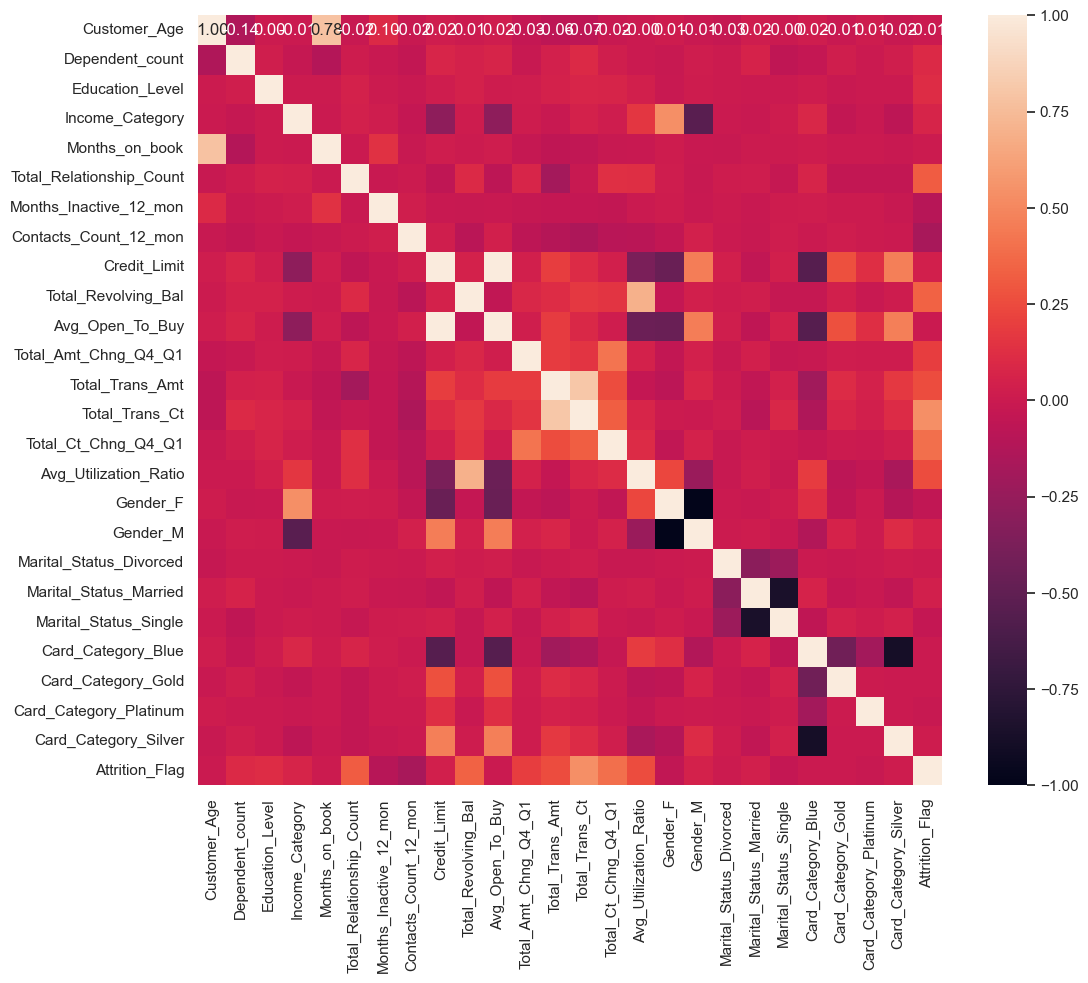

Attrition_Flag              1.000000
Total_Trans_Ct              0.535920
Total_Ct_Chng_Q4_Q1         0.396320
Total_Revolving_Bal         0.340959
Total_Relationship_Count    0.319444
Total_Trans_Amt             0.255250
Avg_Utilization_Ratio       0.253006
Total_Amt_Chng_Q4_Q1        0.192232
Education_Level             0.116736
Dependent_count             0.098331
Income_Category             0.063153
Gender_M                    0.052974
Credit_Limit                0.032871
Marital_Status_Married      0.032348
Card_Category_Silver        0.015232
Months_on_book              0.003877
Marital_Status_Divorced     0.003332
Avg_Open_To_Buy            -0.000364
Customer_Age               -0.005482
Card_Category_Blue         -0.006453
Card_Category_Gold         -0.007272
Card_Category_Platinum     -0.020145
Marital_Status_Single      -0.034786
Gender_F                   -0.052974
Months_Inactive_12_mon     -0.094725
Contacts_Count_12_mon      -0.170450
Name: Attrition_Flag, dtype: float64


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data_after_smote.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Viewing correlation of features with the target variable
print(corr_matrix['Attrition_Flag'].sort_values(ascending=False))


### Set 1: Mutual Features Across All Three Methods
This set includes features that were identified as important by all three methods: Random Forest feature importance, Recursive Feature Elimination (RFE), and Correlation Analysis.

##### Mutual Features:

- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Total_Relationship_Count

### Set 2: All Important Features
This set includes all features identified as important by at least one of the three methods.

##### All Important Features:

- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Total_Relationship_Count
- Avg_Utilization_Ratio
- Total_Amt_Chng_Q4_Q1
- Credit_Limit
- Gender_F
- Income_Category
- Card_Category_Blue
- Avg_Open_To_Buy
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Total_Trans_Amt

In [47]:
data_after_smote.to_csv('/Users/kusumsaichowdary/Downloads/newbankdataM.csv', index=False)
